In [1]:
import numpy as np 
arr = np.array([2,3,4,6,7,8,9,12,13,16,17,23,25,27,34,37,201])
arr

array([  2,   3,   4,   6,   7,   8,   9,  12,  13,  16,  17,  23,  25,
        27,  34,  37, 201])

In [2]:
Q1 =np.percentile(arr,25)
Q3 = np.percentile(arr,75)

In [3]:
IQR = Q3-Q1

In [4]:
UF = Q3 + (1.5*IQR) 
LF = Q1 - (1.5*IQR)

In [5]:
l = []
for i in arr:
    if i >= LF and i<=UF:
        l.append(i)
arr2 = np.array(l)

In [6]:
arr2

array([ 2,  3,  4,  6,  7,  8,  9, 12, 13, 16, 17, 23, 25, 27, 34, 37])

In [7]:
import seaborn as sns 

<Axes: >

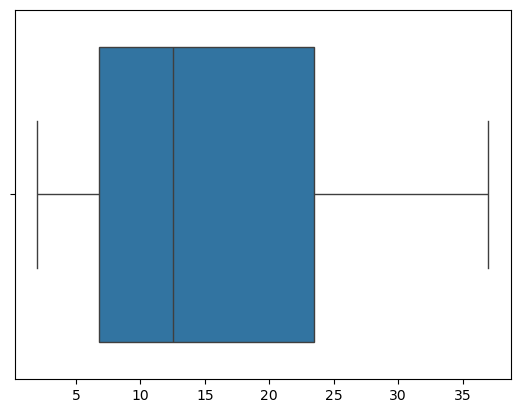

In [8]:
sns.boxplot(x =arr2)

# Data Distribution 

# Ztest

In [9]:
import numpy as np 
from scipy.stats import norm

In [10]:
sample = [172, 174, 168, 169, 171, 173, 175, 170, 169, 172]
population_mean = 170
population_std = 3
samp_mean = np.mean(sample)
n = len(sample)

In [11]:
z_score = (samp_mean - population_mean) / (population_std / np.sqrt(n))
z_score

np.float64(1.3703203194063098)

In [12]:
p_value = 2*(1-norm.cdf(abs(z_score)))
p_value

np.float64(0.17058693287143756)

In [13]:
alpha = 0.05

if p_value < alpha:
    print("I will reject the null hypothesis")
else:
    print("i will accept the null hypothesis ")

i will accept the null hypothesis 


# t-test

In [14]:
import numpy as np 
from scipy import stats 

In [15]:
sample = [172, 174, 168, 169, 171, 173, 175, 170, 169, 172]
sample_mean = np.mean(sample)
sample_std = np.std(sample,ddof = 1)
n = len(sample)
mean_population = 170

In [16]:
t_stats = (sample_mean - mean_population) / (sample_std / np.sqrt(n))
t_stats

np.float64(1.7782469350914734)

In [17]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stats),df = n -1 ))
alpha = 0.05

In [18]:
p_value

np.float64(0.10907771593031335)

In [20]:
alpha

0.05

In [21]:
if p_value < alpha:
    print("reject the null hypothesis")
else:
    print("accept the null hypothesis")

accept the null hypothesis


# two_sample_T-test.**

In [23]:
import numpy as np 
from scipy import stats 

In [24]:
group_A = [85, 88, 90, 92, 87, 85, 89, 91, 86, 88] 
group_B = [82, 84, 80, 83, 81, 79, 78, 85, 84, 83]  

In [25]:
t_stats , p_value = stats.ttest_ind(group_A, group_B , equal_var= False)

In [26]:
t_stats

np.float64(5.829604009507161)

In [27]:
p_value

np.float64(1.610475598965881e-05)

In [28]:
alpha = 0.05

In [29]:
if p_value < alpha:
    print("I will reject the null hypothesis ")
else:
    print("i will accept the null hypothesis" )

I will reject the null hypothesis 


# ChiSquare

In [30]:
import numpy as np 
import seaborn as sns 
from scipy.stats import chi2_contingency
import pandas as pd 

In [31]:
df = sns.load_dataset('titanic')

In [32]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
contingency_table = pd.crosstab(df['sex'],df['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [34]:
chi2, p_value , dof , expected = chi2_contingency(contingency_table)


In [35]:
expected

array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]])

In [36]:
p_value

np.float64(1.1973570627755645e-58)

In [37]:
dof

1

In [38]:
chi2

np.float64(260.71702016732104)

In [39]:
alpha = 0.05

In [40]:
if p_value < alpha:
    print("we reject the null hypothesis and there is a significant relationship between gender and survivl")
else:
    print("there is no connenction")

we reject the null hypothesis and there is a significant relationship between gender and survivl


# ANNOVA_test

In [41]:
import seaborn as sns
import pandas as pd 
from scipy.stats import f_oneway

In [42]:
df = sns.load_dataset('titanic')

In [43]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [44]:
df = df[['age','pclass']].dropna()

In [45]:
df

,age,pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
885,39.0,3
886,27.0,2
887,19.0,1
889,26.0,1


In [46]:
df['pclass'].unique()

array([3, 1, 2])

In [49]:
class_1 = df[df['pclass'] == 1]['age']
class_2 = df[df['pclass'] == 2]['age']
class_3 = df[df['pclass'] == 3]['age']
class_1

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 186, dtype: float64

In [50]:
f_stats, p_value = f_oneway(class_1,class_2,class_3)

In [51]:
alpha = 0.05

In [52]:
if p_value < alpha:
    print("reject the null hypothesis and there is a signafacant difference in atleat one passenger class")

else:
    print("there is no significant difference ")

reject the null hypothesis and there is a signafacant difference in atleat one passenger class
